https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/m

In [107]:
from keras.models import Sequential, clone_model
from keras.layers import Dense
# from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
# sns.set_palette("bright", 10)
from numpy import array
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse


from sklearn.preprocessing import LabelEncoder

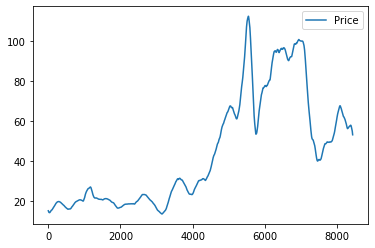

In [2]:
file_path = "ntt-data-global-ai-challenge-06-2020/"

oil_trend = pd.read_csv(file_path + "Crude_oil_trend_From1986-10-16_To2020-03-31.csv")
oil_trend.plot()

In [65]:
train = pd.read_csv(file_path + "COVID-19_train.csv")
test = pd.read_csv(file_path + "COVID-19_test.csv")

# train.columns

In [135]:
X = train[['World_new_deaths']]
y  = train['Price']

X_test = test[['World_new_deaths']]
# test_set = test.iloc[:,-5:]
# test_set.insert(0, 'Date', test["Date"])
# X.insert(0, 'Date', train["Date"])

In [119]:
# def split_sequence(sequence, n_steps):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps
#         # check if we are beyond the sequence
#         if end_ix > len(sequence)-1:
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)

In [120]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [136]:
window = 3
lag = 1
# series = series_to_supervised(X.drop('Date', axis=1), window=window, lag=lag)
# series.head()
y_train = y[lag+1:]

X_train = series_to_supervised(X)
X_test = series_to_supervised(X_test)

In [137]:
X_train  = X_train.to_numpy()
# X_train = pd.array(X_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))


X_test  = X_test.to_numpy()
# X_train = pd.array(X_train)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [130]:
n_features = 1

In [131]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [133]:
# fit model
mlp_history = model.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
61/61 [==============================] - 0s 346us/step - loss: 3.7256
Epoch 2/1000
61/61 [==============================] - 0s 434us/step - loss: 4.1437
Epoch 3/1000
61/61 [==============================] - 0s 321us/step - loss: 2.9269
Epoch 4/1000
61/61 [==============================] - 0s 353us/step - loss: 2.9801
Epoch 5/1000
61/61 [==============================] - 0s 314us/step - loss: 3.5959
Epoch 6/1000
61/61 [==============================] - 0s 407us/step - loss: 3.4323
Epoch 7/1000
61/61 [==============================] - 0s 323us/step - loss: 3.4006
Epoch 8/1000
61/61 [==============================] - 0s 257us/step - loss: 3.6844
Epoch 9/1000
61/61 [==============================] - 0s 310us/step - loss: 3.1797
Epoch 10/1000
61/61 [==============================] - 0s 303us/step - loss: 2.5222
Epoch 11/1000
61/61 [==============================] - 0s 355us/step - loss: 3.6338
Epoch 12/1000
61/61 [==============================] - 0s 424us/step - loss: 3.0326
E

61/61 [==============================] - 0s 377us/step - loss: 7.9663
Epoch 99/1000
61/61 [==============================] - 0s 427us/step - loss: 20.8984
Epoch 100/1000
61/61 [==============================] - 0s 618us/step - loss: 29.7202
Epoch 101/1000
61/61 [==============================] - 0s 378us/step - loss: 18.2902
Epoch 102/1000
61/61 [==============================] - 0s 333us/step - loss: 30.5254
Epoch 103/1000
61/61 [==============================] - 0s 343us/step - loss: 68.3216
Epoch 104/1000
61/61 [==============================] - 0s 309us/step - loss: 65.5092
Epoch 105/1000
61/61 [==============================] - 0s 369us/step - loss: 54.8620
Epoch 106/1000
61/61 [==============================] - 0s 314us/step - loss: 88.0732
Epoch 107/1000
61/61 [==============================] - 0s 338us/step - loss: 62.7668
Epoch 108/1000
61/61 [==============================] - 0s 312us/step - loss: 32.4742
Epoch 109/1000
61/61 [==============================] - 0s 296us/step -

61/61 [==============================] - 0s 340us/step - loss: 34.8158
Epoch 194/1000
61/61 [==============================] - 0s 494us/step - loss: 67.0537
Epoch 195/1000
61/61 [==============================] - 0s 474us/step - loss: 129.3962
Epoch 196/1000
61/61 [==============================] - 0s 320us/step - loss: 59.3973
Epoch 197/1000
61/61 [==============================] - 0s 391us/step - loss: 111.6443
Epoch 198/1000
61/61 [==============================] - 0s 412us/step - loss: 91.4396
Epoch 199/1000
61/61 [==============================] - 0s 506us/step - loss: 83.0388
Epoch 200/1000
61/61 [==============================] - 0s 418us/step - loss: 112.7778
Epoch 201/1000
61/61 [==============================] - 0s 414us/step - loss: 45.6190
Epoch 202/1000
61/61 [==============================] - 0s 357us/step - loss: 34.6346
Epoch 203/1000
61/61 [==============================] - 0s 431us/step - loss: 64.2107
Epoch 204/1000
61/61 [==============================] - 0s 305us/s

61/61 [==============================] - 0s 643us/step - loss: 124.6839
Epoch 289/1000
61/61 [==============================] - 0s 516us/step - loss: 110.4333
Epoch 290/1000
61/61 [==============================] - 0s 438us/step - loss: 102.2958
Epoch 291/1000
61/61 [==============================] - 0s 429us/step - loss: 83.0090
Epoch 292/1000
61/61 [==============================] - 0s 349us/step - loss: 82.6999
Epoch 293/1000
61/61 [==============================] - 0s 317us/step - loss: 80.0224
Epoch 294/1000
61/61 [==============================] - 0s 373us/step - loss: 63.3743
Epoch 295/1000
61/61 [==============================] - 0s 319us/step - loss: 62.7858
Epoch 296/1000
61/61 [==============================] - 0s 322us/step - loss: 55.0243
Epoch 297/1000
61/61 [==============================] - 0s 374us/step - loss: 52.0782
Epoch 298/1000
61/61 [==============================] - 0s 358us/step - loss: 56.3298
Epoch 299/1000
61/61 [==============================] - 0s 327us/s

61/61 [==============================] - 0s 326us/step - loss: 32.3180
Epoch 384/1000
61/61 [==============================] - 0s 340us/step - loss: 48.8175
Epoch 385/1000
61/61 [==============================] - 0s 261us/step - loss: 14.5618
Epoch 386/1000
61/61 [==============================] - 0s 319us/step - loss: 46.2180
Epoch 387/1000
61/61 [==============================] - 0s 426us/step - loss: 17.1790
Epoch 388/1000
61/61 [==============================] - 0s 309us/step - loss: 16.5815
Epoch 389/1000
61/61 [==============================] - 0s 340us/step - loss: 12.4920
Epoch 390/1000
61/61 [==============================] - 0s 277us/step - loss: 7.5551
Epoch 391/1000
61/61 [==============================] - 0s 261us/step - loss: 9.3104
Epoch 392/1000
61/61 [==============================] - 0s 286us/step - loss: 10.2401
Epoch 393/1000
61/61 [==============================] - 0s 329us/step - loss: 7.2912
Epoch 394/1000
61/61 [==============================] - 0s 322us/step - 

61/61 [==============================] - 0s 534us/step - loss: 1.9574
Epoch 480/1000
61/61 [==============================] - 0s 439us/step - loss: 4.1774
Epoch 481/1000
61/61 [==============================] - 0s 498us/step - loss: 4.2469
Epoch 482/1000
61/61 [==============================] - 0s 343us/step - loss: 2.1705
Epoch 483/1000
61/61 [==============================] - 0s 409us/step - loss: 2.2908
Epoch 484/1000
61/61 [==============================] - 0s 350us/step - loss: 2.7144
Epoch 485/1000
61/61 [==============================] - 0s 327us/step - loss: 1.9566
Epoch 486/1000
61/61 [==============================] - 0s 344us/step - loss: 3.3100
Epoch 487/1000
61/61 [==============================] - 0s 305us/step - loss: 4.1142
Epoch 488/1000
61/61 [==============================] - 0s 320us/step - loss: 2.8542
Epoch 489/1000
61/61 [==============================] - 0s 415us/step - loss: 4.5135
Epoch 490/1000
61/61 [==============================] - 0s 403us/step - loss: 5.

61/61 [==============================] - 0s 376us/step - loss: 10.6833
Epoch 576/1000
61/61 [==============================] - 0s 391us/step - loss: 9.8409
Epoch 577/1000
61/61 [==============================] - 0s 315us/step - loss: 4.7296
Epoch 578/1000
61/61 [==============================] - 0s 314us/step - loss: 17.4879
Epoch 579/1000
61/61 [==============================] - 0s 323us/step - loss: 10.3827
Epoch 580/1000
61/61 [==============================] - 0s 310us/step - loss: 5.2926
Epoch 581/1000
61/61 [==============================] - 0s 252us/step - loss: 8.1646
Epoch 582/1000
61/61 [==============================] - 0s 263us/step - loss: 6.5209
Epoch 583/1000
61/61 [==============================] - 0s 275us/step - loss: 2.4964
Epoch 584/1000
61/61 [==============================] - 0s 274us/step - loss: 4.6231
Epoch 585/1000
61/61 [==============================] - 0s 381us/step - loss: 3.3042
Epoch 586/1000
61/61 [==============================] - 0s 380us/step - loss:

61/61 [==============================] - 0s 805us/step - loss: 11.1271
Epoch 671/1000
61/61 [==============================] - 0s 640us/step - loss: 8.9536
Epoch 672/1000
61/61 [==============================] - 0s 488us/step - loss: 11.9870
Epoch 673/1000
61/61 [==============================] - 0s 522us/step - loss: 9.3466
Epoch 674/1000
61/61 [==============================] - 0s 465us/step - loss: 7.4427
Epoch 675/1000
61/61 [==============================] - 0s 487us/step - loss: 9.5320
Epoch 676/1000
61/61 [==============================] - 0s 441us/step - loss: 4.9928
Epoch 677/1000
61/61 [==============================] - 0s 390us/step - loss: 8.8115
Epoch 678/1000
61/61 [==============================] - 0s 454us/step - loss: 8.5226
Epoch 679/1000
61/61 [==============================] - 0s 767us/step - loss: 6.3486
Epoch 680/1000
61/61 [==============================] - 0s 759us/step - loss: 7.2772
Epoch 681/1000
61/61 [==============================] - 0s 697us/step - loss: 

61/61 [==============================] - 0s 332us/step - loss: 2.2962
Epoch 767/1000
61/61 [==============================] - 0s 319us/step - loss: 2.6765
Epoch 768/1000
61/61 [==============================] - 0s 318us/step - loss: 2.5787
Epoch 769/1000
61/61 [==============================] - 0s 306us/step - loss: 2.1879
Epoch 770/1000
61/61 [==============================] - 0s 418us/step - loss: 2.0897
Epoch 771/1000
61/61 [==============================] - 0s 355us/step - loss: 2.1136
Epoch 772/1000
61/61 [==============================] - 0s 291us/step - loss: 1.8435
Epoch 773/1000
61/61 [==============================] - 0s 416us/step - loss: 2.5726
Epoch 774/1000
61/61 [==============================] - 0s 355us/step - loss: 1.8169
Epoch 775/1000
61/61 [==============================] - 0s 345us/step - loss: 1.8239
Epoch 776/1000
61/61 [==============================] - 0s 306us/step - loss: 2.4396
Epoch 777/1000
61/61 [==============================] - 0s 325us/step - loss: 1.

61/61 [==============================] - 0s 549us/step - loss: 1.8681
Epoch 863/1000
61/61 [==============================] - 0s 386us/step - loss: 2.0646
Epoch 864/1000
61/61 [==============================] - 0s 527us/step - loss: 1.8170
Epoch 865/1000
61/61 [==============================] - 0s 461us/step - loss: 2.2090
Epoch 866/1000
61/61 [==============================] - 0s 397us/step - loss: 2.5691
Epoch 867/1000
61/61 [==============================] - 0s 397us/step - loss: 1.4696
Epoch 868/1000
61/61 [==============================] - 0s 366us/step - loss: 2.6022
Epoch 869/1000
61/61 [==============================] - 0s 354us/step - loss: 1.8835
Epoch 870/1000
61/61 [==============================] - 0s 404us/step - loss: 2.2120
Epoch 871/1000
61/61 [==============================] - 0s 392us/step - loss: 3.2403
Epoch 872/1000
61/61 [==============================] - 0s 370us/step - loss: 3.1252
Epoch 873/1000
61/61 [==============================] - 0s 362us/step - loss: 2.

61/61 [==============================] - 0s 390us/step - loss: 2.1599
Epoch 959/1000
61/61 [==============================] - 0s 369us/step - loss: 2.6973
Epoch 960/1000
61/61 [==============================] - 0s 386us/step - loss: 2.5639
Epoch 961/1000
61/61 [==============================] - 0s 274us/step - loss: 1.8327
Epoch 962/1000
61/61 [==============================] - 0s 340us/step - loss: 3.0052
Epoch 963/1000
61/61 [==============================] - 0s 358us/step - loss: 2.9661
Epoch 964/1000
61/61 [==============================] - 0s 339us/step - loss: 2.0231
Epoch 965/1000
61/61 [==============================] - 0s 389us/step - loss: 3.8165
Epoch 966/1000
61/61 [==============================] - 0s 351us/step - loss: 3.9503
Epoch 967/1000
61/61 [==============================] - 0s 293us/step - loss: 2.7882
Epoch 968/1000
61/61 [==============================] - 0s 466us/step - loss: 2.7510
Epoch 969/1000
61/61 [==============================] - 0s 409us/step - loss: 2.

In [138]:
yhat = model.predict(X_test, verbose=1)

35/35 [==============================] - 0s 4ms/step


In [139]:
print(yhat)

[[124.62867 ]
 [178.73042 ]
 [116.24877 ]
 [152.87988 ]
 [208.80168 ]
 [440.15942 ]
 [241.5103  ]
 [168.02911 ]
 [132.43689 ]
 [303.80023 ]
 [681.533   ]
 [575.6328  ]
 [143.2767  ]
 [208.79065 ]
 [194.08498 ]
 [509.5605  ]
 [551.59283 ]
 [ 88.76916 ]
 [112.092224]
 [279.7797  ]
 [342.7783  ]
 [254.81778 ]
 [135.82198 ]
 [130.40349 ]
 [196.7172  ]
 [397.0954  ]
 [372.74353 ]
 [156.15417 ]
 [124.67795 ]
 [208.86491 ]
 [388.56598 ]
 [378.646   ]
 [134.20126 ]
 [109.870575]
 [128.17656 ]]
